# Boston House Price Dataset Analysis

In this dataset, we will **predict the price** of the Boston house. This is a very basic and popular dataset for beginner data scientist.

<!-- <p align="center">
<img src="penguin.png" width="480">
</p> -->

Source code I downloaded from: [Kaggle](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)

___

|Rating           |A challenge dataset for outliers treatment|
|-----------------|-|
|Difficulty       | <font size=5>  &#9733; &#9733; &#9733; &#9733; &#9734; </font> |
|Dataset size     | <font size=5>  &#9733; &#9734; &#9734; &#9734; &#9734; </font> |
|Interesting topic| <font size=5>  &#9733; &#9733; &#9733; &#9734; &#9734; </font> |
|Popularity       | <font size=5>  &#9733; &#9733; &#9733; &#9733; &#9733; </font> |

___

In [1]:
# Framework for data cleaning and data visualising
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Framework for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
sns.set_style("darkgrid")

In [3]:
# [Please notice]
# this CSV file has ' ' (space) as a separated value, instead of ',' (comma). Therefore, we need `delim_whitespace=True`
# Also, this dataset does not have column names. We need `header=None` to avoid reading the first valuable row!

df = pd.read_csv("housing.csv", header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


___

## 1) A data's problem

*What area of a room is the warmest?*

***The corner, because it's always about 90 degrees!***

___

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


___

Fortunately, this dataset does not have null columns. However, each column name in the table is the number. Therefore, we have to fix it manually. However, let's have a look with these feature first:

0) `CRIM` is the crime rate per capita by town. Mostly they are pretty low, but some regions have extremely high crime rate!
1) `ZN` is the percentage of residential land zoned for lots > 25,000 sq.ft, or 2322 m2. To be simpler, it is the percentage of area that you can build a house or something else.
2) `INDUS` is the percentage of non-retail business.
3) `CHAS`: if `1` the house is near or beside the Charles River.
4) `NOX` is the nitric oxides rate (value per 10 million, instead of per 100).
5) `RM` is the average number of rooms.
6) `AGE` is the average number of houses built before 1940. I hope this explanation is correct.
7) `DIS` is how far away from the main job areas.
8) `RAD` is the value showing the difficulty to get to highways.
9) `TAX` is the rate per \$10,000. This explanation is quite over-simple.
10) `PTRATIO` is the percentage of pupils and teachers.
11) `B`: from `1000 * (Bk − 0.63) ^ 2`, where `Bk` is the percentage of the black.
12) `LSTAT` is the percentage of the lower-status or people.
13) `MEDV` is the median value of owner-occupied homes in $1000s.

The dataset can also be found on [an older version of ScikitLearn](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html).

**I had a stroke when searching the meaning of these.**

___

In [5]:
# Replace column names
df.rename(columns={
    0: "CRIM", 1: "ZN", 2: "INDUS", 3: "CHAS", 4: "NOX", 5: "RM", 6: "AGE",
    7: "DIS", 8: "RAD", 9: "TAX", 10: "PTRATIO", 11: "B", 12: "LSTAT", 13: "MEDV"
}, inplace=True)

___

## 2) Analysis

*What do real estate agents have to be thankful for this year?*

***Lots.***

___

### Data distribution

___

In [6]:
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

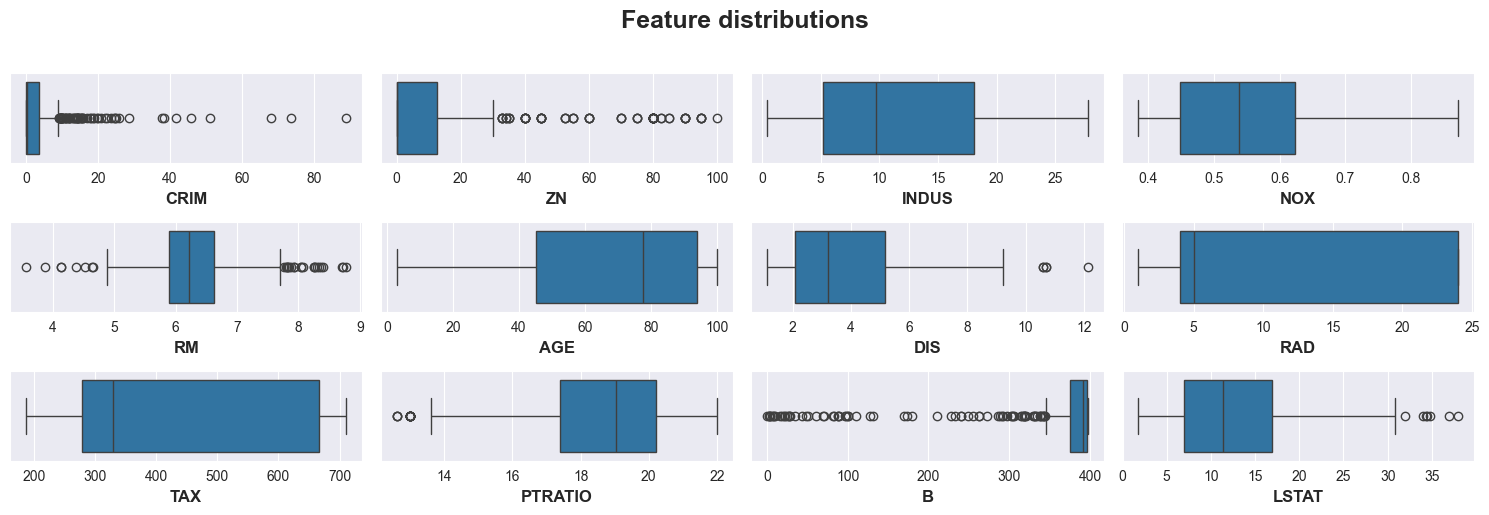

In [7]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))
fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    #curr_ax.boxplot(df[columns[i]], vert=False)
    sns.boxplot(df, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

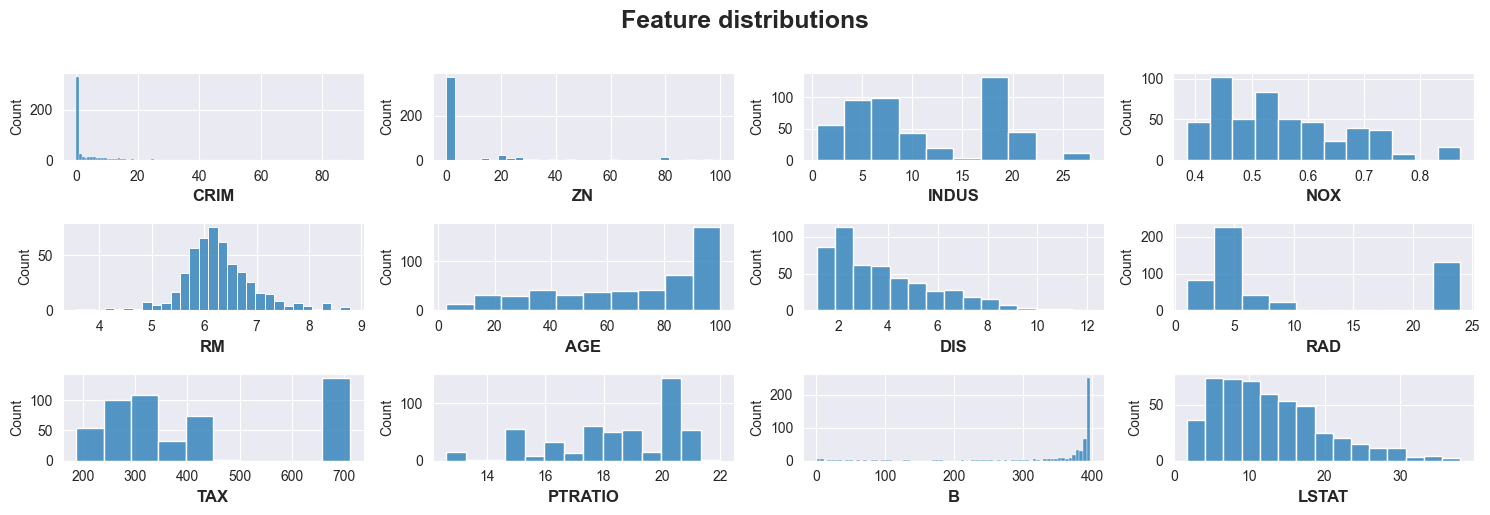

In [8]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))
fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    sns.histplot(df, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

___

0) `CRIM`: 
1) `ZN`: Most of the values are 0. That means many houses do not have residential land, or extra land for anything else besides the house itself. Or this could not have been filled properly.
2) `INDUS` data distribution is not normal. Notice the lack of values near 15. This is more difficult to transform them into a normal distribution.
3) `CHAS` \[not mentioned\]
4) `NOX` is quite severe. Transforming it into normal distribution is a must.
5) `RM` is pretty fine. However, there exists some outliers.
6) `AGE` is severely skewed. It must be transformed.
7) `DIS` is also severely skewed.
8) `RAD` is likely to have a bimodal distribution. Also, the vacant valley in the middle is pretty large. Thus, linear regression **cannot use this feature**.
9) `TAX` is similar to `RAD`. Thus **ignore this feature** when modeling linear regression.
10) `PTRATIO` has a weird distribution. This should be modified.
11) `B` has an extremely badly left-skewed distribution. This is **not ideal for linear regression**.
12) `LSTAT` is moderately left-skewed.

___

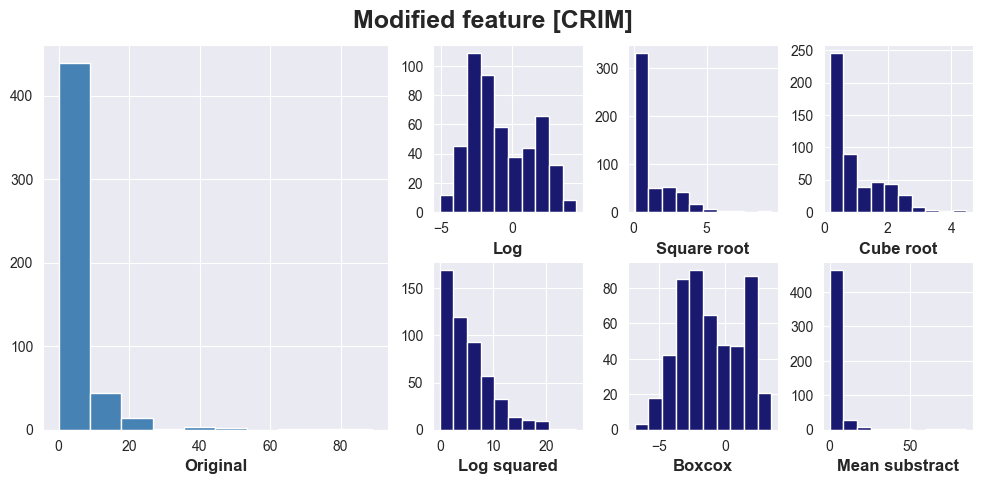

In [9]:
# Library from self-code
import sys
sys.path.append("..")
import general

general.check_modifications(df, "CRIM")

___

The features are modified below depending on what will help the model run better. For example, the feature named "CRIM" is severely left-skewed. However, using log function can help modifying the distribution.
For further information, see the PDF file in the same folder.

___

In [10]:
df_fixed = df.copy()

# Log -> CRIM, INDUS, DIS, LSTAT
df_fixed["CRIM"] = np.log(df_fixed["CRIM"])    # Adding '+ 1' would receive a different result
df_fixed["INDUS"] = np.log(df_fixed["INDUS"])
df_fixed["DIS"] = np.log(df_fixed["DIS"])
df_fixed["PTRATIO"] = np.log(df_fixed["PTRATIO"] + 1)
df_fixed["LSTAT"] = np.log(df_fixed["LSTAT"])

# Boxcox -> NOX, 
df_fixed["NOX"] = boxcox(df_fixed["NOX"])[0]

# Mean subtraction
df_fixed["AGE"] = np.abs(df_fixed["AGE"] - np.mean(df_fixed["AGE"]))

# Boolean
df_fixed["ZN"] = df_fixed["ZN"].apply(lambda x: x != 0)

In [11]:
# Outliers
q1 = np.percentile(df_fixed["RM"], 25, method='midpoint')
q3 = np.percentile(df_fixed["RM"], 75, method='midpoint')
iqr = q3 - q1

upper_range = q3 + 1.5 * iqr
lower_range = q3 - 1.5 * iqr

df_fixed = df_fixed[(df_fixed["RM"] > lower_range) & (df_fixed["RM"] < upper_range)]

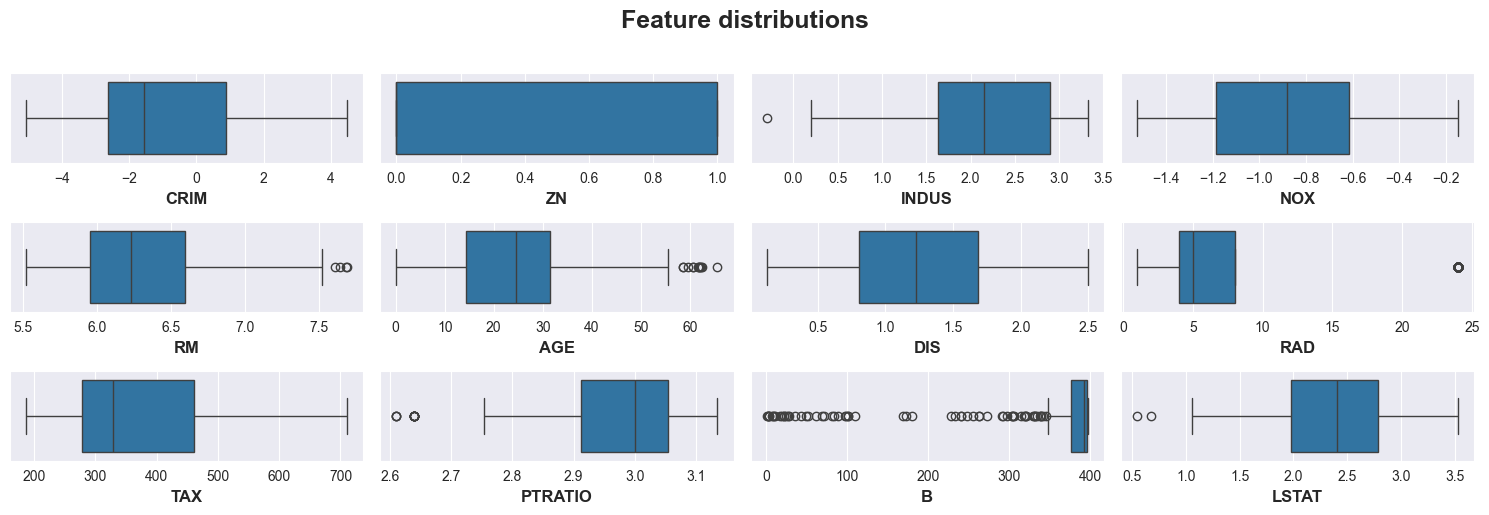

In [12]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))

fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    #curr_ax.boxplot(boxcox(df[columns[i]] + 1)[0], vert=False)
    sns.boxplot(df_fixed, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

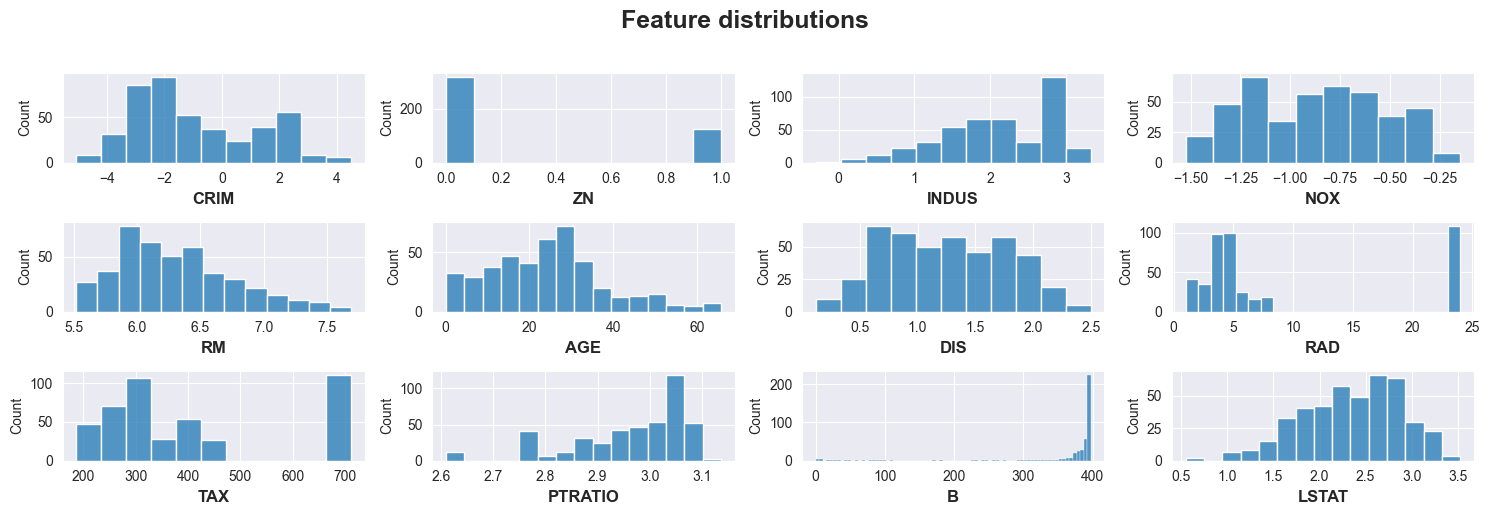

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))

fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    sns.histplot(df_fixed, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

### Correlation coefficients

___

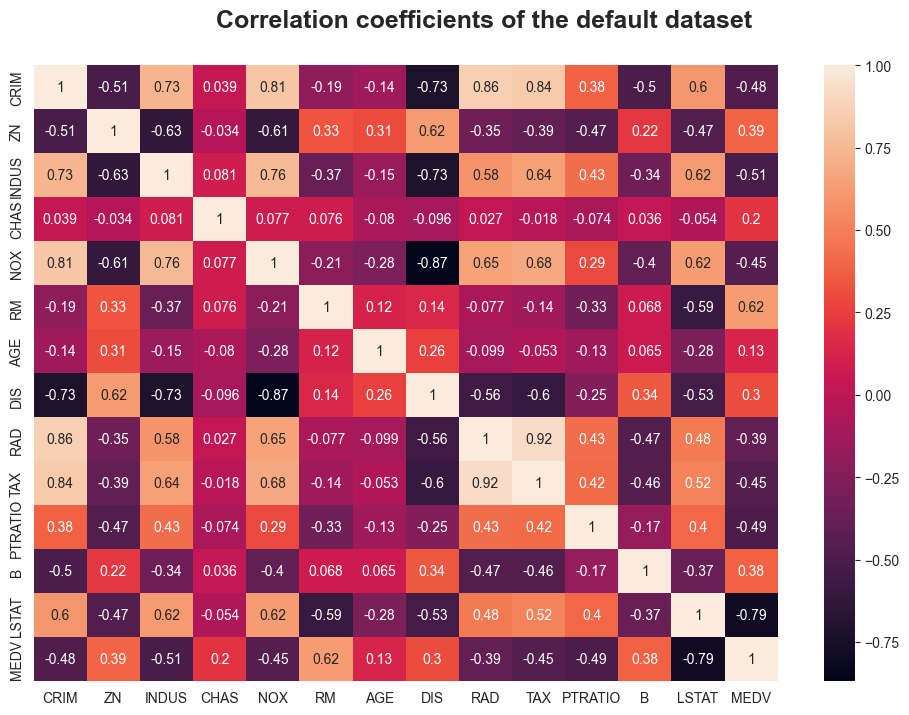

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_fixed.corr(), annot=True, ax=ax)
fig.suptitle("Correlation coefficients of the default dataset", fontsize=18, fontweight="bold", y=0.95)

plt.show()

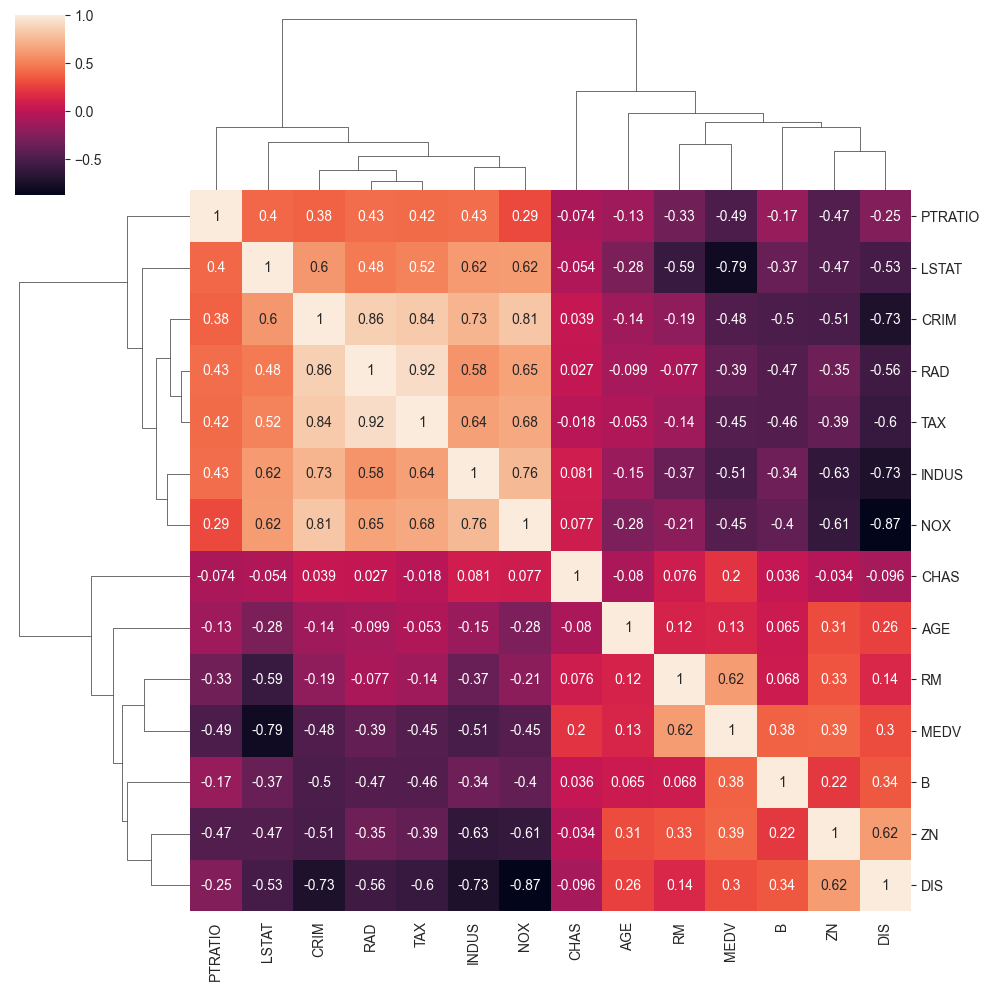

In [15]:
sns.clustermap(df_fixed.corr(), annot=True)

___

It is huge, but let's have a look of each of these:

- These are the features related to `MEDV` (label). **It seems**:
- 
  - `ZN`: Houses with residential area will be more expensive.
  - **`RM`**: The more expensive houses have more rooms.
  - `DIS`: The expensive houses is far away from the main job area.

- And inverse ratio. **It seems**:
  - `CRIM`: Low criminal rate makes the house more valuable.
  - **`INDUS`**: Surprisingly, the houses with high business rate would be likely to cheaper.
  - `NOX`: The high rate of nitric oxide lower the quality of the house.
  - `AGE`: Old house has higher age. It is not like antique products, as the quality of the house plays an important part of the price (although there is an exception).
  - `PTRATIO`: The more teachers and students are, the cheaper the houses can be.
  - **`LSTAT`**: The rich people mostly gather in specific places, as well as the poor ones.

- Unmentioned:
  - `B`: The extremely badly right-skewed distribution makes this inappropriate to linear regression.
  - `CHAS`: extremely imbalance (0, 1) values.
  - `RAD`: At first, it seems smooth roads may have more pricey houses. However, the distribution is bimodal, thus the analysis in this case can be incorrect.
  - `TAX`: One interesting point is that it has a strong relationship with `RAD`. To train model, we can ignore this.

___

___

## 3) Modeling

*What type of real estate transactions do dwarves prefer?*

***Short sales.***

___

In [16]:
linear_features = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
full_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']   # Not using TAX

In [17]:
scaler = StandardScaler()
df_fixed_2 = scaler.fit_transform(df_fixed)
df_fixed_2 = pd.DataFrame(df_fixed_2, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [18]:
df_fixed_3 = shuffle(df_fixed_2)

In [19]:
def get_data_metric(model, scoring=None):
    global df
    global df_fixed
    global df_fixed_2
    global linear_features
    global full_features

    print("Using some features:")
    print(" -  Before cleaning:                 {}".format( cross_val_score(model, df[linear_features],         df["MEDV"],         cv=5).mean(), scoring=scoring ))
    print(" -  After modifying:                 {}".format( cross_val_score(model, df_fixed[linear_features],   df_fixed["MEDV"],   cv=5).mean(), scoring=scoring ))
    print(" -  Modifying + Scaling:             {}".format( cross_val_score(model, df_fixed_2[linear_features], df_fixed_2["MEDV"], cv=5).mean(), scoring=scoring ))
    print(" -  Modifying + Scaling + Shuffling: {}".format( cross_val_score(model, df_fixed_3[linear_features], df_fixed_3["MEDV"], cv=5).mean(), scoring=scoring ))
    
    print("\nUsing all the features:")
    print(" -  Before cleaning:                 {}".format( cross_val_score(model, df[full_features],         df["MEDV"],         cv=5).mean(), scoring=scoring ))
    print(" -  After modifying:                 {}".format( cross_val_score(model, df_fixed[full_features],   df_fixed["MEDV"],   cv=5).mean(), scoring=scoring ))
    print(" -  Modifying + Scaling:             {}".format( cross_val_score(model, df_fixed_2[full_features], df_fixed_2["MEDV"], cv=5).mean(), scoring=scoring ))
    print(" -  Modifying + Scaling + Shuffling: {}".format( cross_val_score(model, df_fixed_3[full_features], df_fixed_3["MEDV"], cv=5).mean(), scoring=scoring ))

___

### Linear Regression

The linear regression model is the simplest model, Yet it requires strict preprocessings, including treating outliers and normal distributions.
Let's check the model before and after preprocessing.

___

In [20]:
lr_model = LinearRegression()
get_data_metric(lr_model)

Using some features:
 -  Before cleaning:                 0.4436998394264388
 -  After modifying:                 0.5392870362735454
 -  Modifying + Scaling:             0.5392870362735478
 -  Modifying + Scaling + Shuffling: 0.713257168159456

Using all the features:
 -  Before cleaning:                 0.3492545410466791
 -  After modifying:                 0.5667285663161892
 -  Modifying + Scaling:             0.5667285663161894
 -  Modifying + Scaling + Shuffling: 0.7416752612437397


___

**After cleaning, the result seems to improve**.
Shuffling the data can improve the model. This is because of the data order. This problem will be referred later.

Let's try K-Nearest Neighbours.

___

In [21]:
knn_model = KNeighborsRegressor(n_neighbors=21)
get_data_metric(knn_model, "neg_mean_squared_error")

Using some features:
 -  Before cleaning:                 0.2835781894709566
 -  After modifying:                 -0.17906924431908294
 -  Modifying + Scaling:             0.517074710553628
 -  Modifying + Scaling + Shuffling: 0.6753173742653259

Using all the features:
 -  Before cleaning:                 0.01350801616668853
 -  After modifying:                 -0.1680147161241198
 -  Modifying + Scaling:             0.4493855438373554
 -  Modifying + Scaling + Shuffling: 0.6516818534234711


___

Unlike Linear Regression model, when it can **assign the weight to the feature as value of 0 if it does not have correlative relationship**, K-Nearest Neighbours model **depends on all the features**. If one feature has the problem, the model can be malfunctional as well.

Surprisingly, after modifying but before Standard Scaler, the model does not give good results.

Also, **Standard Scaler is mainly used to improve the K-Nearest Neighbours model.**

Let's try Decision Tree.

___

In [34]:
dt_model = DecisionTreeRegressor(max_depth=24)
get_data_metric(dt_model)

Using some features:
 -  Before cleaning:                 0.14800283412353252
 -  After modifying:                 -0.1272195925688961
 -  Modifying + Scaling:             0.04445216207855056
 -  Modifying + Scaling + Shuffling: 0.6369929939221788

Using all the features:
 -  Before cleaning:                 0.20629009815189722
 -  After modifying:                 -0.22030666090645185
 -  Modifying + Scaling:             -0.061323658575490644
 -  Modifying + Scaling + Shuffling: 0.6575357842804855


___

Decision Tree is one of the strong models. However, without shuffling, the data distribution may not work properly. As mentioned before, the data order may cause this. However, KFold Cross-Validation does not shuffle the data.

We will see the detail below.

___

In [23]:
print("Using some features:")
print(" -  Modifying + Scaling:             {}".format( cross_val_score(dt_model, df_fixed_2[linear_features], df_fixed_2["MEDV"], cv=5) ))
print(" -  Modifying + Scaling + Shuffling: {}".format( cross_val_score(dt_model, df_fixed_3[linear_features], df_fixed_3["MEDV"], cv=5) ))

Using some features:
 -  Modifying + Scaling:             [ 0.33699169  0.64155832  0.05042721  0.39772666 -1.90307215]
 -  Modifying + Scaling + Shuffling: [0.4428147  0.68693553 0.75643786 0.80580854 0.45392161]


Before shuffling, there is one fold whose result is badly negative.

If it's still pretty difficult to imagine, let's illutrate it

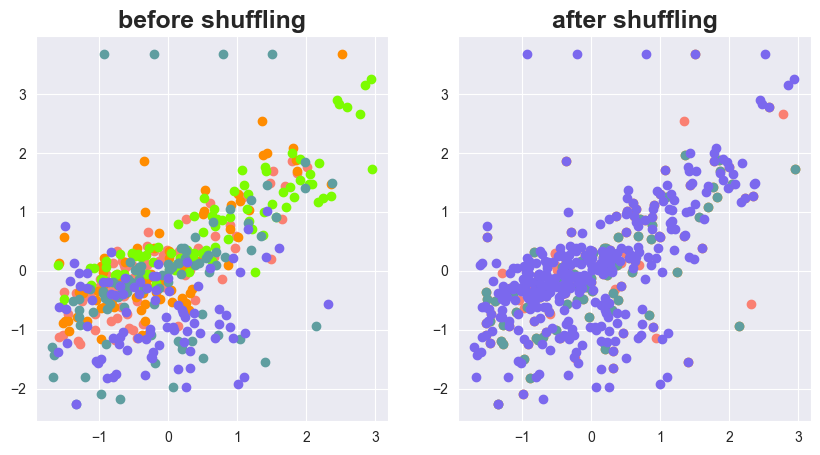

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

data_size = df_fixed_2.shape[0]
batch = data_size // 5

ax[0].scatter(df_fixed_2.loc[:batch, "RM"], df_fixed_2.loc[:batch, "MEDV"], color="salmon")
ax[0].scatter(df_fixed_2.loc[batch:batch*2, "RM"], df_fixed_2.loc[batch:batch*2, "MEDV"], color="darkorange")
ax[0].scatter(df_fixed_2.loc[batch*2:batch*3, "RM"], df_fixed_2.loc[batch*2:batch*3, "MEDV"], color="lawngreen")
ax[0].scatter(df_fixed_2.loc[batch*3:batch*4, "RM"], df_fixed_2.loc[batch*3:batch*4, "MEDV"], color="cadetblue")
ax[0].scatter(df_fixed_2.loc[batch*4:, "RM"], df_fixed_2.loc[batch*4:, "MEDV"], color="mediumslateblue")
ax[0].set_title("before shuffling", fontsize=18, fontweight="bold")

ax[1].scatter(df_fixed_3.loc[:batch, "RM"], df_fixed_3.loc[:batch, "MEDV"], color="salmon")
ax[1].scatter(df_fixed_3.loc[batch:batch*2, "RM"], df_fixed_3.loc[batch:batch*2, "MEDV"], color="darkorange")
ax[1].scatter(df_fixed_3.loc[batch*2:batch*3, "RM"], df_fixed_3.loc[batch*2:batch*3, "MEDV"], color="lawngreen")
ax[1].scatter(df_fixed_3.loc[batch*3:batch*4, "RM"], df_fixed_3.loc[batch*3:batch*4, "MEDV"], color="cadetblue")
ax[1].scatter(df_fixed_3.loc[batch*4:, "RM"], df_fixed_3.loc[batch*4:, "MEDV"], color="mediumslateblue")
ax[1].set_title("after shuffling", fontsize=18, fontweight="bold")

plt.show()

___

It all makes sense now! One of the folds includes the outliers (in this case, cadet blue fold / 4th fold). This would cause major different results when using KFold Cross-Validation.

This one of the **overfitting problems** (good at training but bad at testing).

Last but not least, let's try Random Forest.

___

In [33]:
rf_model = RandomForestRegressor(max_depth=16, n_estimators=125)
get_data_metric(dt_model)

Using some features:
 -  Before cleaning:                 0.03545507220787645
 -  After modifying:                 -0.1865167066700531
 -  Modifying + Scaling:             0.048037771825401164
 -  Modifying + Scaling + Shuffling: 0.6662360603803942

Using all the features:
 -  Before cleaning:                 0.06512508390040903
 -  After modifying:                 0.021049917376332727
 -  Modifying + Scaling:             -0.08677663727694025
 -  Modifying + Scaling + Shuffling: 0.6657716539472762


___

Similar to Decision Tree model, this one can be affected by data order. The result is pretty clear and beautiful.

___

___

### Moral of the story:

- Use Standard Scaler for K-Nearest Neighbours.
- Shuffle the data before training (If using train_test_split, this step can be ignored).
- Linear Regression with proper modifying data can be powerful like Decision Tree and Random Forest.

___

https://www.baeldung.com/cs/normalization-vs-standardization

https://stats.stackexchange.com/questions/209241/what-transformation-should-i-use-for-a-bimodal-distribution